In [1]:
from scripts.load_data import load_data
from matplotlib import pyplot as plt

In [2]:
df, df_party_members = load_data()

574119 speeches in total
505705 speeches of party members (longer than 50 characters)


### Oops, there are duplicates

24905 duplicates


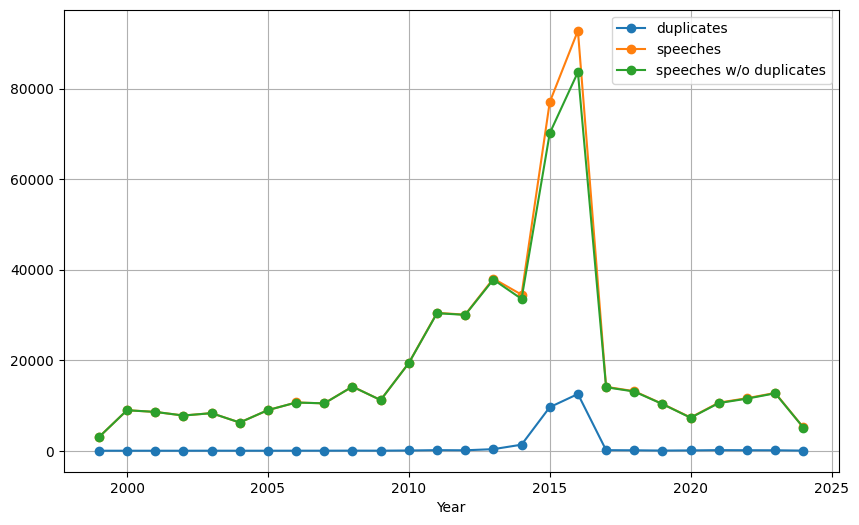

In [3]:
df_duplicates = df_party_members[df_party_members["text"].duplicated(keep=False)]

print(len(df_duplicates), "duplicates")

# plot number of duplicates per year
duplicates_per_year = df_duplicates['year'].value_counts().sort_index()
speeches_per_year = df_party_members['year'].value_counts().sort_index()
speeches_per_year_wo_duplicates = df_party_members[~df_party_members["text"].duplicated(keep="first")]["year"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(duplicates_per_year.index, duplicates_per_year.values, marker='o', label="duplicates")
plt.plot(speeches_per_year.index, speeches_per_year.values, marker='o', label="speeches")
plt.plot(speeches_per_year_wo_duplicates.index, speeches_per_year_wo_duplicates.values, marker='o', label="speeches w/o duplicates")
# plt.title('Number of Duplicates per Year')
plt.xlabel('Year')
plt.legend()
# plt.yscale('log')
# plt.ylabel('Number of Duplicates')
plt.grid()
plt.show()



Text(0.5, 1.0, 'Proportion of duplicates per year')

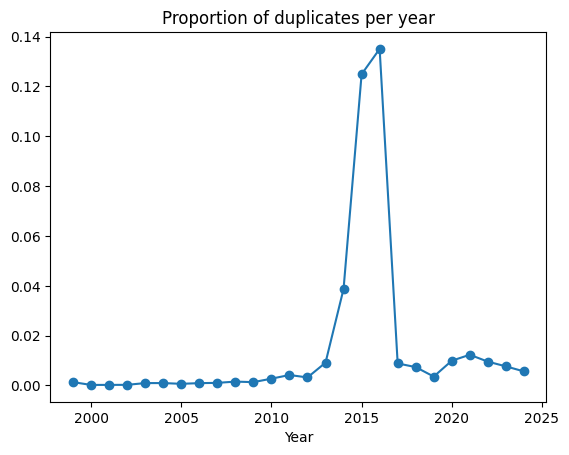

In [4]:
prop_dups_per_year = (duplicates_per_year / speeches_per_year)
plt.figure()
plt.plot(prop_dups_per_year.index, prop_dups_per_year.values, marker='o', label="proportion of duplicates")
plt.xlabel("Year")
plt.title("Proportion of duplicates per year")

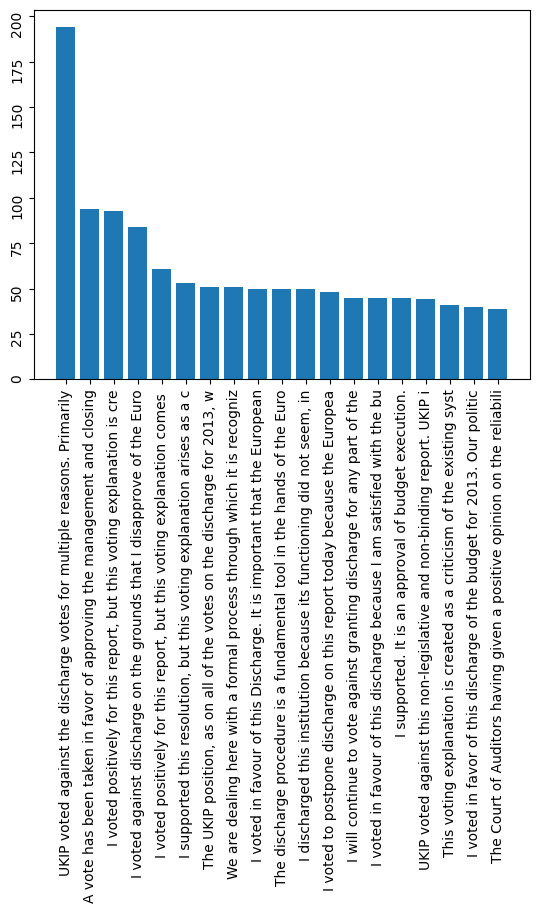

In [ ]:
duplicates_by_text = df_duplicates.groupby(["text"])
duplicates_by_text = duplicates_by_text.agg(
    count = ("text", "size"), 
    translatedText = ("translatedText", "first"), # keep first translation (assuming might not always be identical), 
    translatedShort = ("translatedText", lambda x: x.iloc[0][:70]),
    parties = ("party", list),
    agendas = ("uq_agenda", list),
    years = ("year", list),
    speakers = ("speaker", list)
)

top_dups = duplicates_by_text.sort_values("count", ascending=False).head(20)

plt.bar(top_dups["translatedShort"], top_dups["count"])
_ = plt.xticks(rotation=90)
_ = plt.yticks(rotation=90)
plt.title("Speeches with most duplicates")
# shortened_labels = [l[:100]+"..." if len(l) > 100 else l for l in [lb.get_text() for lb in ax.get_xticklabels()]]
# _ = ax.set_xticklabels(shortened_labels)

Most of the duplicates are from the same party:

In [17]:
n_agendas_per_dup = duplicates_by_text["parties"].map(lambda l: len(set(l)))
n_agendas_per_dup.value_counts().sort_index()

parties
1    6975
2       6
Name: count, dtype: int64

In [19]:
6975 / len(duplicates_by_text)

0.9991405242801891

In [7]:
# Most speeches are from the same agenda,
n_agendas_per_dup = duplicates_by_text["agendas"].map(lambda l: len(set(l)))
n_agendas_per_dup.value_counts()

agendas
1     5135
2     1238
3      296
4       91
5       80
6       33
8       23
7       17
9        9
10       7
12       4
11       4
45       3
50       3
27       3
13       3
37       2
51       2
48       2
16       2
24       2
41       2
19       2
22       2
30       2
32       2
33       2
31       1
17       1
39       1
14       1
40       1
25       1
61       1
93       1
53       1
15       1
Name: count, dtype: int64

Almost all duplicates are written:

In [8]:
df_duplicates["written"].value_counts().map(lambda x: x/len(df_duplicates)).sort_values(ascending=False)

written
True     0.99747
False    0.00253
Name: count, dtype: float64

Just to compare: in the full dataframe, the number of written speeches are distributed evenly

In [9]:
df_party_members["written"].value_counts().map(lambda x: x/len(df_party_members)).sort_values(ascending=False)

written
True     0.522455
False    0.477545
Name: count, dtype: float64

In [10]:
df_duplicates["party"].value_counts().sort_values(ascending=False)

party
GUE/NGL       8705
S&D           5168
EFDD          3210
PPE           2960
NI            1335
ENF           1223
ECR            953
Greens/EFA     644
ALDE           553
EFD             86
PSE             20
PPE-DE          20
IND/DEM         14
UEN              7
Renew            4
ELDR             2
EDD              1
Name: count, dtype: int64

In [11]:
for i, r in duplicates_by_text[:10].iterrows():
    print(r)

count                                                              2
translatedText     (CS) I too am disturbed by the worries of the ...
translatedShort                                 (CS) I too am distur
parties                                             [PPE-DE, PPE-DE]
agendas            [4. Environmental impact of the planned gas pi...
years                                                   [2008, 2008]
speakers                          [Zuzana Roithová, Zuzana Roithová]
Name: (CS) I too am disturbed by the worries of the tens of thousands of citizens who in their petition highlight the risks accompanying the construction of the biggest gas pipeline at the bottom of the shallow Baltic Sea. Their petition resulted in a public hearing and in a European Parliament report, which highlighted the need to include other countries, and the EU in particular, in the decision-making process. The problems are due to the ecological risks that exist as a result of vast graveyards of warships a

In [12]:
def print_agenda(search_term, n_speeches=None): 
    all_agendas = df[df["uq_agenda"].str.contains(search_term)]["uq_agenda"].unique()
    for agenda in all_agendas: 
        speeches = df[df["uq_agenda"] == agenda].sort_values(by="speechnumber", ascending=True)
        # print("Agenda:", (agenda[:30]+"..." if len(agenda) > 30 else agenda))
        print("Agenda:", agenda)
        print("Nr of speeches:", len(speeches))
        print("")
        
        if n_speeches:
            speeches = speeches[:n_speeches]
        for _, r in speeches.iterrows(): 
            print(f"[{r['speechnumber']}] {r['speaker']} ({r['party']}): {r['translatedText']}")
            
            

In [13]:
print_agenda("8. Explanations of vote2012-07-04")

Agenda: 8. Explanations of vote2012-07-04
Nr of speeches: 735

[1] Vicky Ford (ECR): Mr President, I opposed the report on the attractiveness of investing in Europe. Investment is key to our economic growth. To be competitive we need investment, but unless we are competitive we lose it. To help our small businesses become competitive, I have campaigned urgently for them to be excluded from large bits of EU legislation, but that is not in this text. I am also concerned that larger long-term investors like pension funds and insurance companies face unintended burdens from some of Europe’s legislation on the financial sector. The Committee on International Trade and the Committee on Industry, Research and Energy agreed with me, but this did not make it into the text. Instead, this text calls for further coordination of employment and social policies. We know that when we coordinate at EU level our policies become even more restrictive and not less. The only investor that will be left in E